<a href="https://colab.research.google.com/github/abdelrahmanwagieh/Machine-learning/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading the Dataset and unzipping it


In [157]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [158]:
!unzip insurance.zip

Archive:  insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: insurance.csv           


#EDA



> ## reading the data



In [159]:
import pandas as pd
df=pd.read_csv('insurance.csv')

##gathering info about the Dataset

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [161]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692



> removing the duplicates



In [162]:
df.isna().sum().sum()


0

In [163]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB




> ## Describe the Data



In [164]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010




> ## Extracting the numeric columns



In [165]:
numeric_columns=df.select_dtypes(include=['int64','float64']).columns
numeric_columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')



>## Distribution of Categorical Data




<ipython-input-166-3b4c2cfb29c0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


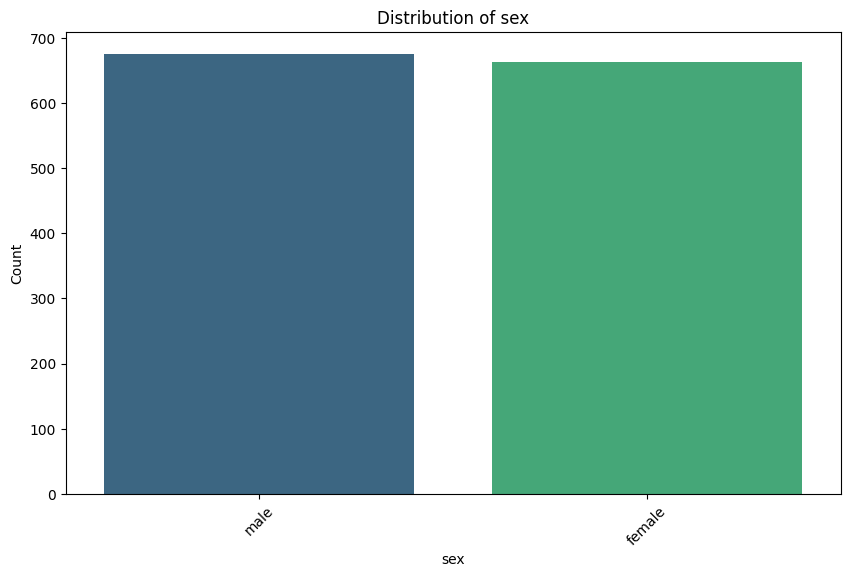

<ipython-input-166-3b4c2cfb29c0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


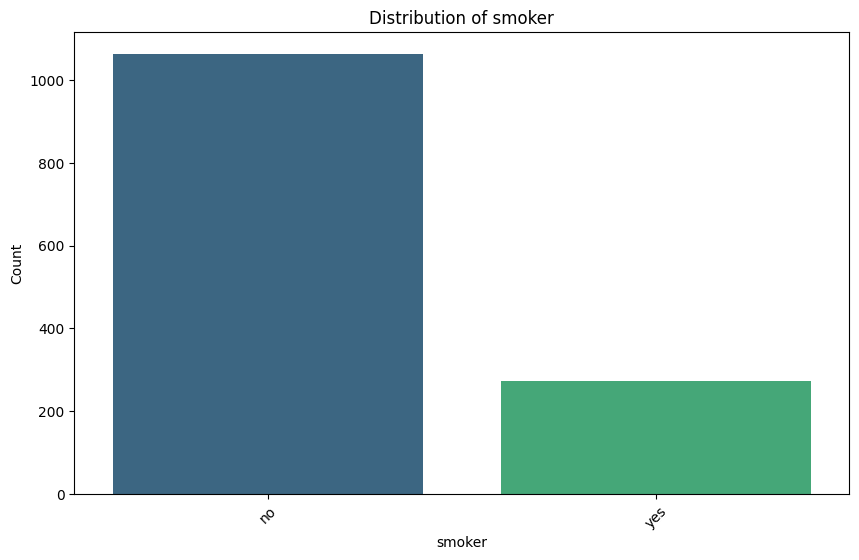

<ipython-input-166-3b4c2cfb29c0>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


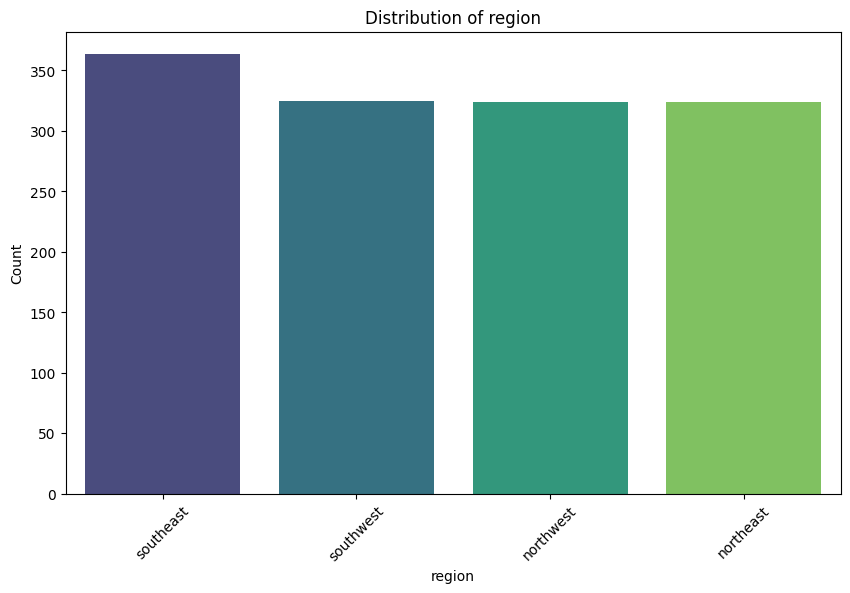

In [166]:
import seaborn as sns

import matplotlib.pyplot as plt



for col in df:
  if col not in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()



> ## Distribution of numeric data



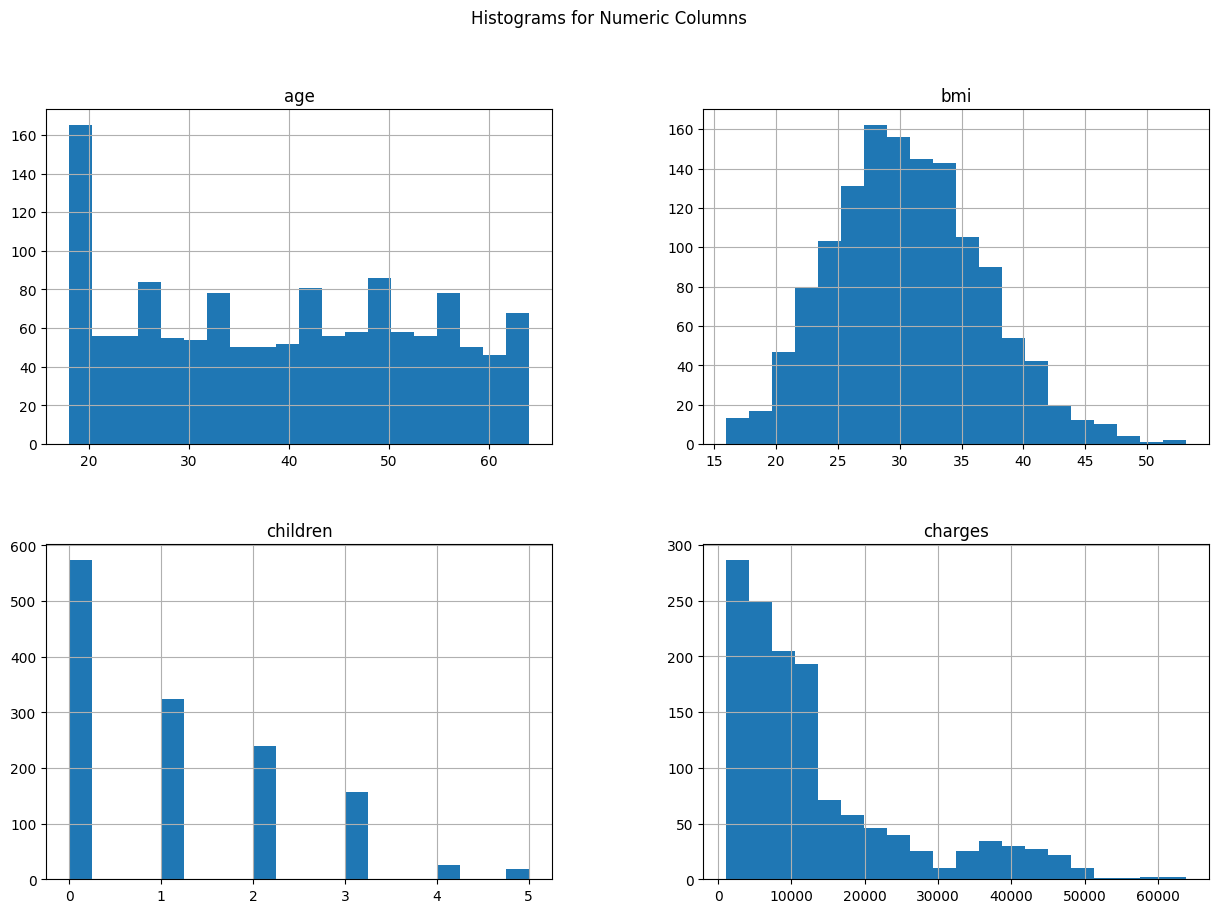

In [167]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numeric Columns')
plt.show()



> ## applying One-Hot Encoding to Categorical Variables



In [168]:
df_one_hot = pd.get_dummies(df, columns=['smoker', 'sex','region']).astype(int)

print("\nDataFrame after One-Hot Encoding:")
df_one_hot.head()


DataFrame after One-Hot Encoding:


,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,1,0,0,0,0,1
1,18,33,1,1725,1,0,0,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0,0,1,0
3,33,22,0,21984,1,0,0,1,0,1,0,0
4,32,28,0,3866,1,0,0,1,0,1,0,0




> ## Plotting the correlation map



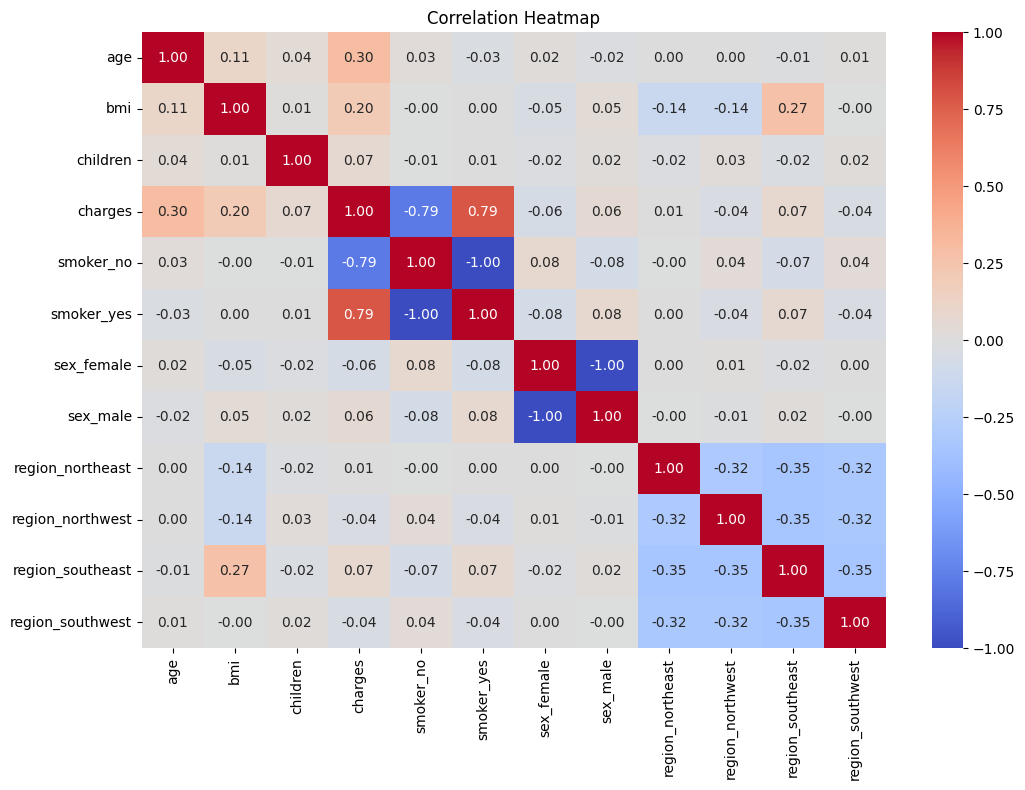

In [169]:
# Apply one-hot encoding to categorical columns

df_one_hot.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_one_hot.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()




# Building a Linear Regression Model from Scratch on the Processed Data





> ## Splitting the Data into Training and Testing Sets



In [170]:
from sklearn.model_selection import train_test_split
X = df_one_hot.drop('charges', axis=1)
y = df_one_hot['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)



> ## the main equation

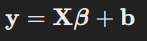





> ## Forming the matrix X



In [171]:
import numpy as np
matrix=np.array(X_train)
print(matrix)
print('matrix shape is ',matrix.shape)

[[32 44  0 ...  0  1  0]
 [21 32  2 ...  1  0  0]
 [44 27  1 ...  0  0  1]
 ...
 [18 39  0 ...  0  1  0]
 [50 34  2 ...  0  0  1]
 [54 25  3 ...  0  0  1]]
matrix shape is  (1069, 11)




> ## forming the vector b



In [172]:
# Create a column of ones to account for the bias term
bias_column = np.ones((X_train.shape[0], 1))
bias_column.shape

(1069, 1)



>## Applying Standard Scaling and Adding Bias Term to Features



In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
# Add bias term to scaled features
bias_column = np.ones((X_scaled.shape[0], 1))
X_with_bias = np.hstack((bias_column, X_scaled))
print(X_with_bias)

[[ 1.         -0.48161986  2.27881065 ... -0.57410974  1.67459561
  -0.57410974]
 [ 1.         -1.27603253  0.31544286 ...  1.74182728 -0.5971591
  -0.57410974]
 [ 1.          0.38501215 -0.50262705 ... -0.57410974 -0.5971591
   1.74182728]
 ...
 [ 1.         -1.49269053  1.46074074 ... -0.57410974  1.67459561
  -0.57410974]
 [ 1.          0.81832815  0.64267083 ... -0.57410974 -0.5971591
   1.74182728]
 [ 1.          1.10720548 -0.82985502 ... -0.57410974 -0.5971591
   1.74182728]]




> ## Computing Predicted Values by Performing the Dot Product of Features and Model Parameters
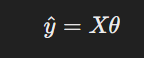


In [174]:
import numpy as np

# Number of features (including the bias term)
num_features = 12  # This should match the number of columns in X_with_bias

# Generate a random vector of thetas with values in the range [0, 1]
theta = np.random.rand(num_features)
print(theta,"\n")
# Reshape theta to be a column vector to make the multplication possible
theta_column = theta.reshape(-1, 1)
v=np.dot(X_with_bias,theta_column)
# Print the column vector

print(v)

[0.40346571 0.15963676 0.04029713 0.74323546 0.99806329 0.02408152
 0.03669144 0.0217347  0.64086093 0.88365219 0.47841419 0.23231103] 

[[ 0.04755316]
 [ 2.04235538]
 [ 0.14554088]
 ...
 [-0.14681676]
 [-1.5536074 ]
 [-0.9462832 ]]


In [175]:
v = v.reshape(-1, 1)
v

array([[ 0.04755316],
       [ 2.04235538],
       [ 0.14554088],
       ...,
       [-0.14681676],
       [-1.5536074 ],
       [-0.9462832 ]])



> ## compute the error between the predicted and the actual value of the target
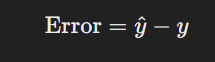



In [176]:
y=np.array(y_train).reshape(-1, 1)

In [177]:
error=v-y
error

array([[ -3993.95244684],
       [-26015.95764462],
       [ -7625.85445912],
       ...,
       [ -1633.14681676],
       [-42857.5536074 ],
       [-25382.9462832 ]])



> ## Compute the cost function for the first time
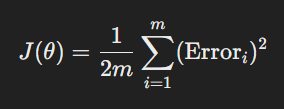



In [178]:
# Number of training examples
m = X_with_bias.shape[0]


# Compute the cost
cost = (1 / (2 * m)) * np.sum(error ** 2)

print("Cost:", cost)


Cost: 160534301.87252364




> ## Calculating Cost and Updating Theta Using Gradient Descent
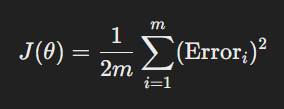





> 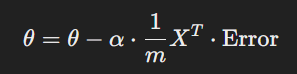



In [179]:
import numpy as np

def run_gradient_descent(X_with_bias, y_train, theta_column, alpha, num_iterations):
    # Length of the data
    m = X_with_bias.shape[0]
    cost_history = []

    for iteration in range(num_iterations):
        # Compute predictions
        Y_hat = np.dot(X_with_bias, theta_column)

        # Compute error
        error = Y_hat - y_train.reshape(-1, 1)

        # Compute gradient
        gradient = (1 / m) * np.dot(X_with_bias.T, error)

        # Update theta
        theta_column -= alpha * gradient

        # Compute cost and print every 10 iterations
        if iteration % 500 == 0:
            cost = (1 / (2 * m)) * np.sum(error ** 2)
            print(f"Iteration {iteration}: Cost {cost}")
            cost_history.append(cost)

    return theta_column, cost_history

# Parameters
alpha = 0.001  # Learning rate
num_iterations = 3001  # Number of iterations

# Generate a random vector of thetas
num_features = X_with_bias.shape[1]  # Number of features (including the bias term)
theta = np.random.rand(num_features)

# Reshape theta to be a column vector
theta_column = theta.reshape(-1, 1)


# Run gradient descent
theta_updated, cost_history = run_gradient_descent(X_with_bias, y, theta_column, alpha, num_iterations)
# Predict using the updated theta
Y_hat_updated = np.dot(X_with_bias, theta_updated)

Iteration 0: Cost 160521882.3424854
Iteration 500: Cost 60754845.203707
Iteration 1000: Cost 33040236.209372334
Iteration 1500: Cost 24042345.789568234
Iteration 2000: Cost 20900197.239521902
Iteration 2500: Cost 19769637.680652548
Iteration 3000: Cost 19357931.636353757




> ## Computing the Final cost



In [180]:
# Predict using the updated theta
Y_hat_updated = np.dot(X_with_bias, theta_updated)

# Compute the error
error_updated = Y_hat_updated.reshape(-1, 1) - y

# Compute the final cost
m = X_with_bias.shape[0]
cost_updated = (1 / (2 * m)) * np.sum(error_updated ** 2)
print(f"Final Cost with Updated Theta: {cost_updated}")

# For a more complete evaluation, you might also want to split your data into training and test sets and calculate performance on both.


Final Cost with Updated Theta: 19357454.548967037




> ## computing the R^2 Score


In [181]:
# Compute the total sum of squares (SST)
y_mean = np.mean(y)
sst = np.sum((y - y_mean) ** 2)

# Compute the sum of squares of residuals (SSR)
ssr = np.sum((y - Y_hat_updated.reshape(-1, 1)) ** 2)

# Compute R^2 score
r2_score = 1 - (ssr / sst)
print(f"R^2 Score: {r2_score}")


R^2 Score: 0.7341815794335549




# Training a Linear Regression Model Using Scikit-Learn



In [141]:
# Features and Target
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
X = df_one_hot.drop('charges', axis=1)
y = df_one_hot['charges']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2 Score:", r2)


R^2 Score: 0.8089024556995761




> ## Learning Curve: Cost vs. Number of Iterations



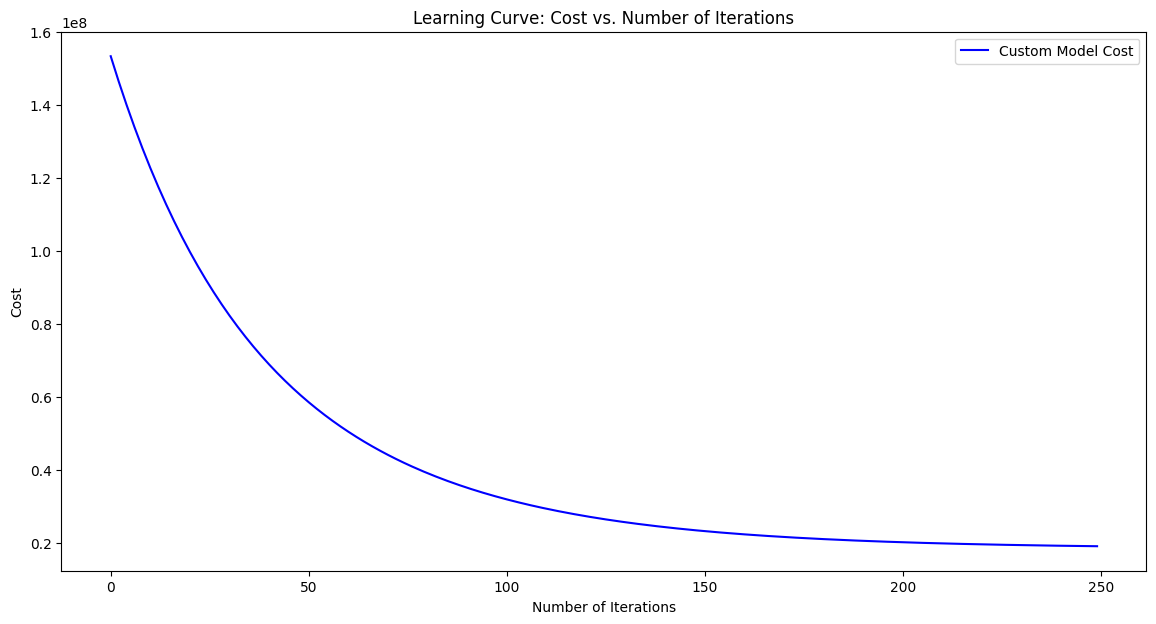

In [126]:
plt.figure(figsize=(14, 7))

plt.plot(range(len(cost_history)), cost_history, color='blue', label='Custom Model Cost')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve: Cost vs. Number of Iterations')
plt.legend()
plt.show()


# Comparison between the two models.






> ## Comparison of Model Fits: Custom Gradient Descent vs. Scikit-learn Linear Regression



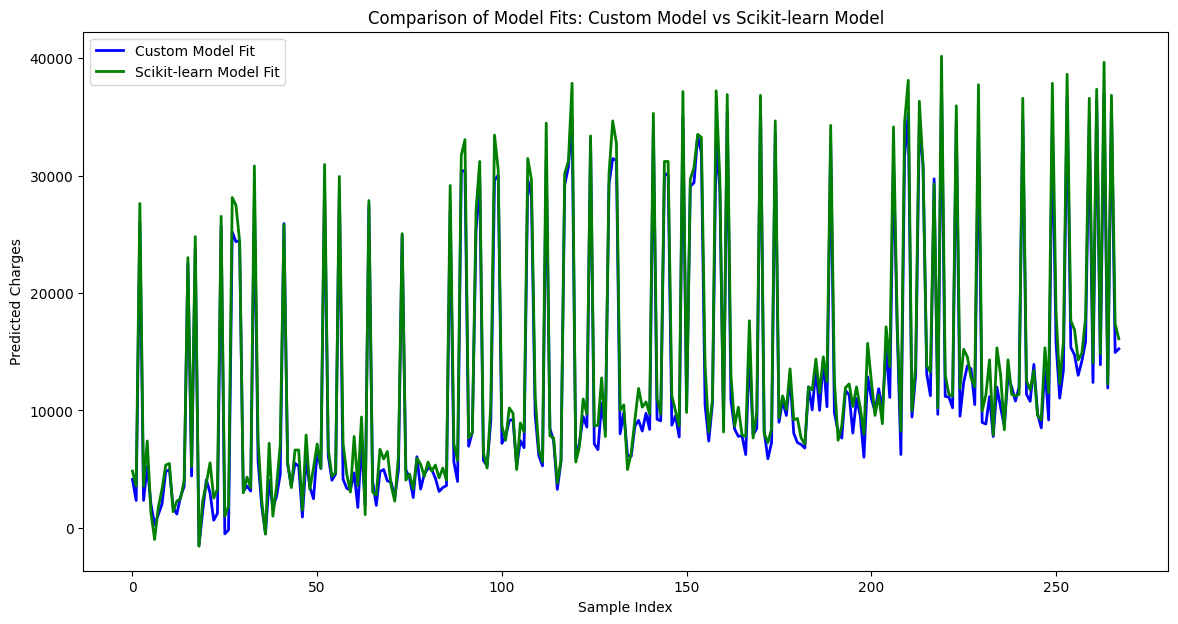

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test_with_bias is used for custom model predictions
X_test_with_bias = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

# Predict using the updated theta from the custom implementation
Y_hat_updated = np.dot(X_test_with_bias, theta_updated)

# Make predictions using scikit-learn model
y_pred_sklearn = model.predict(X_test_scaled)

# Sort X_test for plotting purposes
sorted_indices = np.argsort(X_test_scaled[:, 0])  # Sorting by the first feature, adjust if needed
X_test_sorted = X_test_scaled[sorted_indices]
y_pred_sorted = y_pred_sklearn[sorted_indices]
Y_hat_sorted = np.dot(np.hstack((np.ones((X_test_sorted.shape[0], 1)), X_test_sorted)), theta_updated)

plt.figure(figsize=(14, 7))

# Plot the line for custom model predictions
plt.plot(np.arange(len(Y_hat_sorted)), Y_hat_sorted, color='blue', label='Custom Model Fit', linewidth=2)

# Plot the line for scikit-learn model predictions
plt.plot(np.arange(len(y_pred_sorted)), y_pred_sorted, color='green', label='Scikit-learn Model Fit', linewidth=2)

plt.xlabel('Sample Index')
plt.ylabel('Predicted Charges')
plt.title('Comparison of Model Fits: Custom Model vs Scikit-learn Model')
plt.legend()
plt.show()




> ## Residual Plot: Custom Gradient Descent vs. Scikit-learn Linear Regression



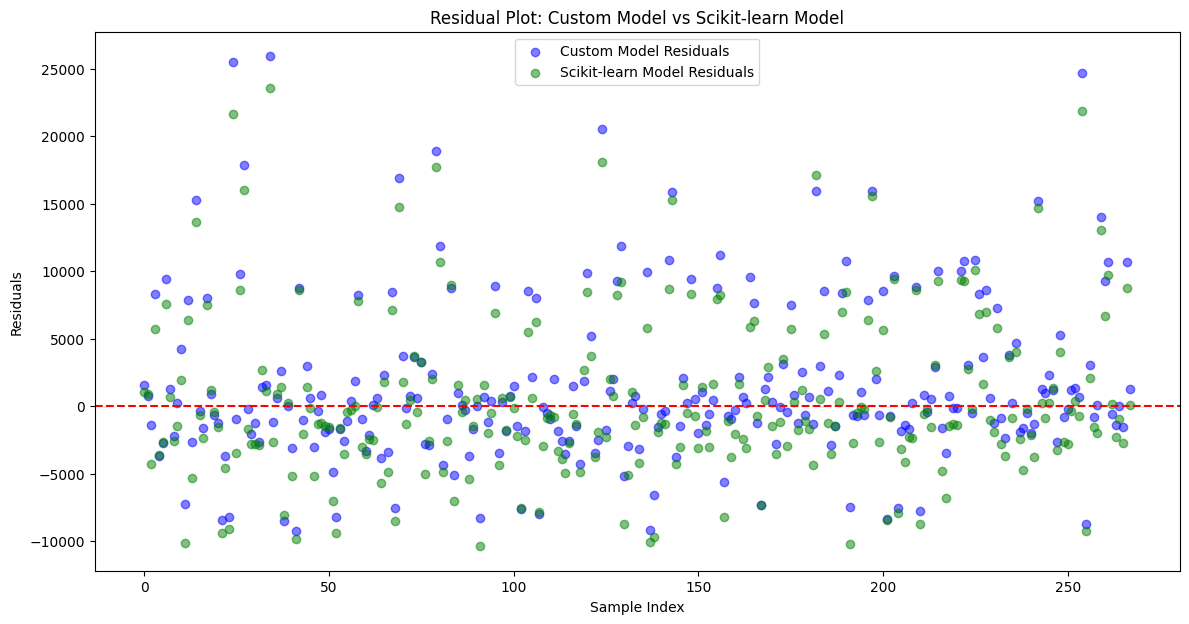

In [97]:
# Calculate residuals for both models
residuals_custom = y_test - Y_hat_updated.flatten()
residuals_sklearn = y_test - y_pred_sklearn

plt.figure(figsize=(14, 7))

# Plot residuals for the custom model
plt.scatter(range(len(residuals_custom)), residuals_custom, color='blue', label='Custom Model Residuals', alpha=0.5)

# Plot residuals for the scikit-learn model
plt.scatter(range(len(residuals_sklearn)), residuals_sklearn, color='green', label='Scikit-learn Model Residuals', alpha=0.5)

plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.title('Residual Plot: Custom Model vs Scikit-learn Model')
plt.legend()
plt.show()



> ## Predicted vs Actual Charges: Custom Model vs. Scikit-learn Model



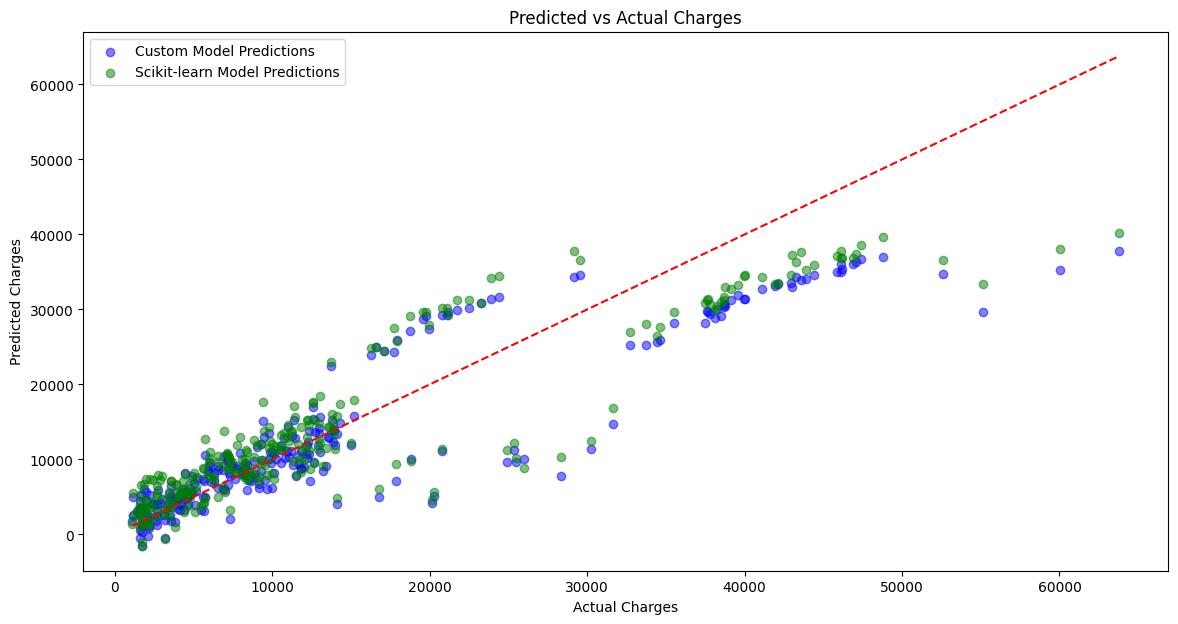

In [98]:
plt.figure(figsize=(14, 7))

# Plot predictions vs actual values for the custom model
plt.scatter(y_test, Y_hat_updated.flatten(), color='blue', label='Custom Model Predictions', alpha=0.5)

# Plot predictions vs actual values for the scikit-learn model
plt.scatter(y_test, y_pred_sklearn, color='green', label='Scikit-learn Model Predictions', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges')
plt.legend()
plt.show()
